In [1]:
import os
import pyrootutils

PROJECT_ROOT_DIR = pyrootutils.setup_root(os.path.abspath(''), dotenv=True, pythonpath=True)
os.chdir(PROJECT_ROOT_DIR)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.patches import Rectangle

from src.utils import _load_data_set
from src.utils_data_centric import _get_data_set_class_level_characteristics
from src.utils_visualization import NotebookFigureSaver

CHAPTER_ID = "b_data_centric"
fig_saver = NotebookFigureSaver(CHAPTER_ID)

Saving figure data_set_Yoga_samples_10_classes_2_embedding


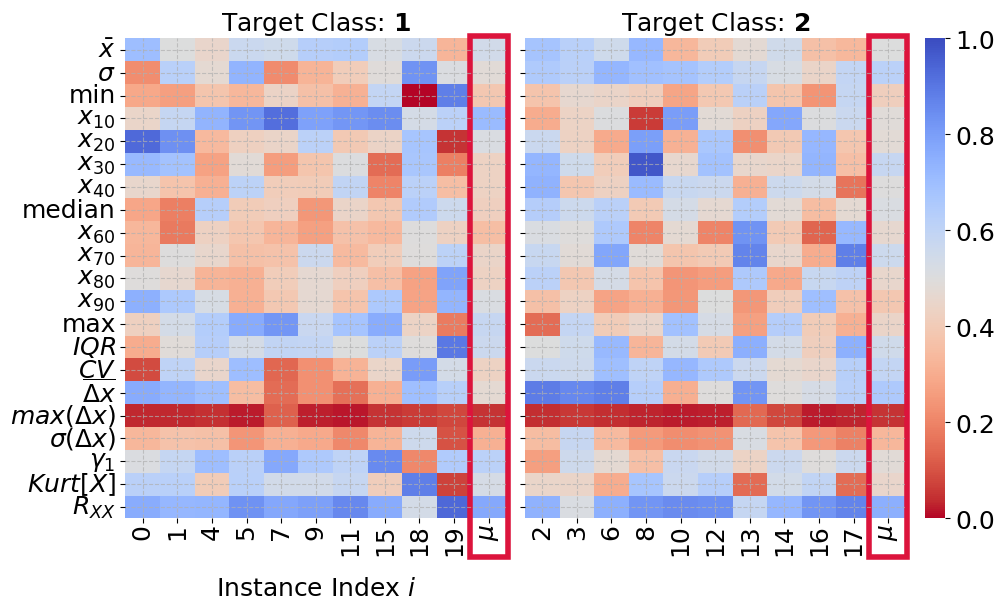

In [2]:
def _visualize_descriptives_data_set(
    data_set_name = "ArrowHead",
    n_samples_per_class = np.inf,
    max_number_classes = 5,
    save_figure=False,
):
    """
    This function creates a visualization representing the descriptive statistics (e.g., mean, standard deviation)
    of instances within each class of a dataset. It scales these statistics to a [0, 1] range for comparability
    and visualizes them as heatmaps, with each class allocated its own subplot. Additionally, it highlights
    mean values across instances within each class.

    Parameters:
    - data_set_name (str): The name of the dataset to visualize. Default is "ArrowHead".
    - n_samples_per_class (int or np.inf): The number of samples per class to include in the visualization.
      If np.inf, all samples from the class are included. Default is np.inf.
    - max_number_classes (int): The maximum number of classes to visualize. If the dataset contains more
      classes, only the first 'max_number_classes' are shown. Default is 5.
    - save_figure (bool): If True, the generated figure is saved using a predefined naming convention.
      Default is False.
    """
    
    target_class_descriptives = _get_data_set_class_level_characteristics(data_set_name)
    
    train_data, test_data = _load_data_set(
        data_set_name=data_set_name
    )

    # get the individual classes
    classes = train_data["class_val"].unique()
    
    # If there are more classes than max_number_classes only take the first ones
    if max_number_classes < len(classes):
        classes = classes[:max_number_classes]

    # identify the mean and max values for each statistic characteristic in order the scale them to [0, 1]
    min_values = pd.DataFrame()
    max_values = pd.DataFrame()
    
    # iterate all target_class keys and values in target_class_descriptives
    for target_class, statistics in target_class_descriptives.items():
        # store the max and min value in each column
        class_min_values = statistics.min(axis=0)
        class_max_values = statistics.max(axis=0)

        # check if the min_values and max_values need to be updated for each value
        min_values[target_class] = class_min_values
        max_values[target_class] = class_max_values

    # identify the min and max values for each statistic characteristic over all classes
    min_values_all_classes = min_values.min(axis=1)
    max_values_all_classes = max_values.max(axis=1)

    # Create subplots for each class
    fig, axes = plt.subplots(
        1, len(classes), figsize=(10, 6), sharex=False, sharey=True
    )
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.8])
    
    available_classes = len(classes)

    for i, target_class in enumerate(sorted(classes)):
        class_statistics = target_class_descriptives[target_class]
        
        # if n_samples_per_class is not inf only select the first n_samples_per_class rows of class_statistics
        if n_samples_per_class != float('inf'):
            class_statistics = class_statistics.head(n_samples_per_class)

        # scale each column to the range [0, 1]
        class_statistics_scaled = (class_statistics - min_values_all_classes) / (
            max_values_all_classes - min_values_all_classes
        )

        # calculate the mean values over all class instances
        mean_df = pd.DataFrame(class_statistics_scaled.mean()).T
        mean_df.index = ["$\mu$"]
        class_statistics_scaled_new = pd.concat([class_statistics_scaled, mean_df], axis=0)

        # Create a heatmap to visualize the statistics
        sns.heatmap(
            class_statistics_scaled_new.T,
            cmap="coolwarm_r",
            center=0.5,
            vmin=0,
            vmax=1,
            ax=axes[i],
            cbar=i == len(classes) - 1,
            cbar_ax=cbar_ax,
            annot=False,
            fmt=".2f",
        )
        
        if i == len(classes) - 1:
            cbar = axes[i].collections[0].colorbar
            cbar.ax.tick_params(labelsize=18)

        if n_samples_per_class == float('inf'):
            visual_samples = class_statistics.shape[0]
        else:
            visual_samples = n_samples_per_class
            
        x, y, w, h = visual_samples -0.05, -0.1, 1.1, class_statistics_scaled_new.shape[1] + 1.8
        axes[i].add_patch(
            Rectangle((x, y), w, h, fill=False, edgecolor="crimson", lw=4, clip_on=False)
        )
        
        
        # Add title and labels to each subplot
        axes[i].tick_params(axis="x", labelsize=18) 
        axes[i].tick_params(axis="y", labelsize=18) 
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90, ha="center")
        axes[i].set_title(f"Target Class: " + r"$\bf{" + str(target_class) + "}$", fontsize=18) 
        axes[i].grid(visible=True, linestyle="--", alpha=0.7)
        
        if i == 0:
            axes[i].set_xlabel(r"Instance Index $i$", fontsize=18, labelpad=15)
        axes[i].tick_params(axis='x', which='major', pad=0)
        
    plt.subplots_adjust(hspace=.5, wspace=0.05,left=0.12,right=0.9,bottom=0.15, top=.95) 
    
    if save_figure:
        fig_saver.save_fig(f"data_set_{data_set_name}_samples_{n_samples_per_class}_classes_{max_number_classes}_embedding")
    plt.show()

_visualize_descriptives_data_set(
    data_set_name = "Yoga",
    n_samples_per_class = 10,
    max_number_classes = 2,
    save_figure = True
)